<a href="https://colab.research.google.com/github/sukeethpatil/cnn/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TensorFlow 2 Object Detection API with Google Colab**

Author: Nisarg Kapkar

Link to [Medium Article](https://medium.com/@nisargkapkar/tensorflow-2-object-detection-api-with-google-colab-b2af171e81cc?source=friends_link&sk=0bb205df0e1c29a2e78c28671ddf4494)! 

NOT: Use this NoteBook in association with the mentioned Medium article, the article contains detailed information (which is not mentioned in this NoteBook) for Step 1, Step 2 and Step 13!

Link to [GitHub Repository](https://github.com/Nkap23/TensorFlow_with_Colab_tutorial)!

Step 1- Prerequisites(Gather/Label images,Create label_map...)

Refer the mentioned [Medium article](https://medium.com/@nisargkapkar/tensorflow-2-object-detection-api-with-google-colab-b2af171e81cc?source=friends_link&sk=0bb205df0e1c29a2e78c28671ddf4494) for more details!

Step 2- Set up the directory structure on Google Drive.

Refer the mentioned [Medium article](https://medium.com/@nisargkapkar/tensorflow-2-object-detection-api-with-google-colab-b2af171e81cc?source=friends_link&sk=0bb205df0e1c29a2e78c28671ddf4494) for more details!

Step 3- Select Hardware Accelerator.

On Colab, go to Runtime->Change Runtime Type and select Hardware accelerator as GPU.

NOTE:
If you have given different names to your files and folders, change the paths in cells below according to your files and folders!

In [2]:
#Step 4- Mount Google Drive.

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
#Step 5- Download TensorFlow Model Garden.

#cd into the TensorFlow directory in your Google Drive
%cd '/content/gdrive/My Drive/TensorFlow'

#and clone the TensorFlow Model Garden repository
!git clone https://github.com/tensorflow/models.git

#using a older version of repo (21 Sept 2020)
%cd '/content/gdrive/MyDrive/TensorFlow/models'
!git checkout -f e04dafd04d69053d3733bb91d47d0d95bc2c8199

/content/gdrive/My Drive/TensorFlow
Cloning into 'models'...
remote: Enumerating objects: 65386, done.
remote: Counting objects: 100% (437/437), done.
remote: Compressing objects: 100% (142/142), done.
remote: Total 65386 (delta 295), reused 433 (delta 295), pack-reused 64949
Receiving objects: 100% (65386/65386), 575.54 MiB | 12.83 MiB/s, done.
Resolving deltas: 100% (45758/45758), done.
Checking out files: 100% (2772/2772), done.
/content/gdrive/MyDrive/TensorFlow/models
Checking out files: 100% (1703/1703), done.
Note: checking out 'e04dafd04d69053d3733bb91d47d0d95bc2c8199'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>

HEAD is now

In [3]:
#Step 6- Install some required libraries and tools.

!apt-get install protobuf-compiler python-lxml python-pil
!pip install Cython pandas tf-slim lvis

Reading package lists... Done
Building dependency tree       
Reading state information... Done
protobuf-compiler is already the newest version (3.0.0-9.1ubuntu1).
The following additional packages will be installed:
  python-bs4 python-chardet python-html5lib python-olefile
  python-pkg-resources python-six python-webencodings
Suggested packages:
  python-genshi python-lxml-dbg python-lxml-doc python-pil-doc python-pil-dbg
  python-setuptools
The following NEW packages will be installed:
  python-bs4 python-chardet python-html5lib python-lxml python-olefile
  python-pil python-pkg-resources python-six python-webencodings
0 upgraded, 9 newly installed, 0 to remove and 37 not upgraded.
Need to get 1,614 kB of archives.
After this operation, 8,908 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python-bs4 all 4.6.0-1 [67.9 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 python-pkg-resources all 39.0.1-2 [128 kB]
Get:3 http:/

In [4]:
#Step 7- Compile the Protobuf libraries.

#cd into 'TensorFlow/models/research'
%cd '/content/gdrive/My Drive/TensorFlow/models/research/'
!protoc object_detection/protos/*.proto --python_out=.

/content/gdrive/My Drive/TensorFlow/models/research


In [5]:
#Step 8- Set the environment.

import os
import sys
os.environ['PYTHONPATH']+=":/content/gdrive/My Drive/TensorFlow/models"
sys.path.append("/content/gdrive/My Drive/TensorFlow/models/research")

In [6]:
#Step 9- Build and Install setup.py.

!python setup.py build
!python setup.py install

running build
running build_py
creating build
creating build/lib
creating build/lib/object_detection
copying object_detection/__init__.py -> build/lib/object_detection
copying object_detection/eval_util.py -> build/lib/object_detection
copying object_detection/eval_util_test.py -> build/lib/object_detection
copying object_detection/export_inference_graph.py -> build/lib/object_detection
copying object_detection/export_tflite_graph_lib_tf2.py -> build/lib/object_detection
copying object_detection/export_tflite_graph_lib_tf2_test.py -> build/lib/object_detection
copying object_detection/export_tflite_graph_tf2.py -> build/lib/object_detection
copying object_detection/export_tflite_ssd_graph.py -> build/lib/object_detection
copying object_detection/export_tflite_ssd_graph_lib.py -> build/lib/object_detection
copying object_detection/export_tflite_ssd_graph_lib_tf1_test.py -> build/lib/object_detection
copying object_detection/exporter.py -> build/lib/object_detection
copying object_detect

In [7]:
#Step 10- Test the installation.

#cd into 'TensorFlow/models/research/object_detection/builders/'
%cd '/content/gdrive/My Drive/TensorFlow/models/research/object_detection/builders/'
!python model_builder_tf2_test.py
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
print('Done')

/content/gdrive/My Drive/TensorFlow/models/research/object_detection/builders
2021-10-26 16:35:47.973946: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-26 16:35:48.403151: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-26 16:35:48.403988: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
Running tests under Python 3.7.12: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_model
2021-10-26 16:35:48.725989: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1)

NOTE:

You should have the images in test and train folder (with their corresponding XML files) and label_map.pbtxt file ready in respective directories.

You should also have the generate_tfrecord.py in your preprocessing directory.

If you don't have these files ready, go back to Step 1 and finish downloading required files.

In [8]:
#Step 11- Generate TFrecords.

#cd into preprocessing directory
%cd '/content/gdrive/My Drive/TensorFlow/scripts/preprocessing'

#run the cell to generate test.record and train.record
!python generate_tfrecord.py -x '/content/gdrive/My Drive/TensorFlow/workspace/training_demo/images/train' -l '/content/gdrive/My Drive/TensorFlow/workspace/training_demo/annotations/label_map.pbtxt' -o '/content/gdrive/My Drive/TensorFlow/workspace/training_demo/annotations/train.record'
!python generate_tfrecord.py -x '/content/gdrive/My Drive/TensorFlow/workspace/training_demo/images/test' -l '/content/gdrive/My Drive/TensorFlow/workspace/training_demo/annotations/label_map.pbtxt' -o '/content/gdrive/My Drive/TensorFlow/workspace/training_demo/annotations/test.record'

# !python generate_tfrecord.py -x '[path_to_train_folder]' -l '[path_to_annotations_folder]/label_map.pbtxt' -o '[path_to_annotations_folder]/train.record'
# !python generate_tfrecord.py -x '[path_to_test_folder]' -l '[path_to_annotations_folder]/label_map.pbtxt' -o '[path_to_annotations_folder]/test.record'


/content/gdrive/My Drive/TensorFlow/scripts/preprocessing
Successfully created the TFRecord file: /content/gdrive/My Drive/TensorFlow/workspace/training_demo/annotations/train.record
Successfully created the TFRecord file: /content/gdrive/My Drive/TensorFlow/workspace/training_demo/annotations/test.record


NOTE:

If you haven't downloaded any pre-trained model yet, go back to Step 1 and finish downloading any pre-trained model of your choice.

We are almost ready to start our model training, just a few more steps before we start our model training!

Step 12- Copying some files


*   Copy the "model_main_tf2.py" file from   "TensorFlow\models\research\object_detection" and paste it into training_demo. We will need this file for training the model.

*   Copy the "exporter_main_v2.py" file from "TensorFlow\models\research\object_detection" and paste it into training_demo.
We will need this file to export the trained model






Step 13- Configure the pipeline file.

Refer the mentioned [Medium article](https://medium.com/@nisargkapkar/tensorflow-2-object-detection-api-with-google-colab-b2af171e81cc?source=friends_link&sk=0bb205df0e1c29a2e78c28671ddf4494) for more details!

In [14]:
#Step 14- Start Tensorboard.

#cd into training_demo
%cd '/content/gdrive/My Drive/TensorFlow/workspace/training_demo'

#start the Tensorboard
%load_ext tensorboard
%tensorboard --logdir=models/my_ssd_resnet50_v1_fpn

# %load_ext tensorboard
# %tensorboard --logdir=models/[name_of_pre-trained-model_you_downloaded]

/content/gdrive/My Drive/TensorFlow/workspace/training_demo


ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
/usr/local/lib/python3.7/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7

invalid info file: '/tmp/.tensorboard-info/pid-308.info'
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/tensorboard/manager.py", line 316, in get_all
    info = _info_from_string(contents)
  File "/usr/local/lib/python3.7/dist-packages/tensorboard/manager.py", line 155, in _info_from_string
    raise ValueError("incompatible version: %r" % (json_value,))
ValueError: incompatible version: {'cache_key': 'eyJhcmd1bWVudHMiOlsiLS1sb2dkaXI9bW9kZWxzL215X3NzZF9yZXNuZXQ1MF92MV9mcG4iXSwiY29uZmlndXJlX2t3YXJncyI6e30sIndvcmtpbmdfZGlyZWN0b3J5IjoiL2NvbnRlbnQvZ2RyaXZlL015IERyaXZlL1RlbnNvckZsb3cvd29ya3NwYWNlL3RyYWluaW5nX2RlbW8ifQ==', 'db': '', 'logdir': 'models/my_ssd_resnet50_v1_fpn', 'path_prefix': '', 'pid': 308, 'port': 6006, 'start_time': 1635326418, 'version': '2.6.0'}
invalid info file: '/tmp/.tensorboard-info/pid-308.info'
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/tensorboard/manager.py", line 316, in get_all
    info = 

In [10]:
#optional
#code to check how much session time is remaining 

import time,psutil
uptime=time.time()-psutil.boot_time()
remaintime=(12*60*60)-uptime
print(remaintime/(60*60))

11.59805181781451


In [ ]:
#Step 15- Train the model.

#run the cell to start model training 
!python model_main_tf2.py --model_dir=models/my_ssd_resnet50_v1_fpn --pipeline_config_path=models/my_ssd_resnet50_v1_fpn/pipeline.config

# !python model_main_tf2.py --model_dir=models/[name_of_pre-trained-model_you_downloaded] --pipeline_config_path=models/[name_of_pre-trained-model_you_downloaded]/pipeline.config

Streaming output truncated to the last 5000 lines.
2021-10-26 20:52:29.396872: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2021-10-26 20:52:33.015638: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2021-10-26 20:52:34.055284: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2021-10-26 20:52:34.456250: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2021-10-26 20:52:34.753497: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2021-10-26 20:52:35.808061: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2021-10-26 20:52:38.363320: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2021-10-26 20:52:38.927975: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2021-10-26 20:52:41.9

In [2]:
%cd '/content/gdrive/My Drive/TensorFlow/workspace/training_demo'

/content/gdrive/My Drive/TensorFlow/workspace/training_demo


In [3]:
!pip install tf_slim

     |████████████████████████████████| 352 kB 6.5 MB/s 


In [4]:
pip install tf-models-official

     |████████████████████████████████| 1.8 MB 8.0 MB/s 
     |████████████████████████████████| 1.2 MB 59.9 MB/s 
     |████████████████████████████████| 43 kB 2.5 MB/s 
     |████████████████████████████████| 596 kB 57.4 MB/s 
     |████████████████████████████████| 213 kB 72.4 MB/s 
     |████████████████████████████████| 90 kB 12.0 MB/s 
     |████████████████████████████████| 4.4 MB 75.6 MB/s 
     |████████████████████████████████| 47.6 MB 36 kB/s 
     |████████████████████████████████| 99 kB 10.8 MB/s 
     |████████████████████████████████| 1.1 MB 56.2 MB/s 
  Created wheel for py-cpuinfo: filename=py_cpuinfo-8.0.0-py3-none-any.whl size=22258 sha256=e0c9618455ee11f5a185f8aa4b1d30d95da15e2a85ee3f1b25fb660b79cdea7a
  Stored in directory: /root/.cache/pip/wheels/d2/f1/1f/041add21dc9c4220157f1bd2bd6afe1f1a49524c3396b94401
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16181 sha256=f06c3ebc67b053606b52f2053a8b5027e5e6a98fd63500b493e52ddd4be47e81
  Stored 

Congratulations! You have finished model training!

In [5]:
#Step 16- Export the Trained Model.
%cd '/content/gdrive/My Drive/TensorFlow/workspace/training_demo'

#run the cell to start model training 
!python exporter_main_v2.py --input_type image_tensor --pipeline_config_path ./models/my_ssd_resnet50_v1_fpn/pipeline.config --trained_checkpoint_dir ./models/my_ssd_resnet50_v1_fpn/ --output_directory ./exported-models/my_model

# !python exporter_main_v2.py --input_type image_tensor --pipeline_config_path ./models/[name_of_pre-trained-model you downloaded]/pipeline.config --trained_checkpoint_dir ./models/[name_of_pre-trained-model_you_downloaded]/ --output_directory ./exported-models/my_model

/content/gdrive/My Drive/TensorFlow/workspace/training_demo
2021-10-28 04:21:21.998964: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-10-28 04:21:21.999030: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (658caefae615): /proc/driver/nvidia/version does not exist
INFO:tensorflow:depth of additional conv before box predictor: 0
I1028 04:21:51.090273 140490264110976 convolutional_keras_box_predictor.py:154] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I1028 04:21:51.090711 140490264110976 convolutional_keras_box_predictor.py:154] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I1028 04:21:51.090942 140490264110976 convolutional_keras_box_predictor.py:154] depth of additional conv before box predic

In [6]:
pip install tensorflow-object-detection-api

     |████████████████████████████████| 577 kB 7.2 MB/s 
     |████████████████████████████████| 54 kB 3.0 MB/s 
     |████████████████████████████████| 54 kB 2.6 MB/s 
     |████████████████████████████████| 3.5 MB 47.6 MB/s 
  Created wheel for tensorflow-object-detection-api: filename=tensorflow_object_detection_api-0.1.1-py3-none-any.whl size=844512 sha256=fa6719e2f5f73ba89c95755f50da951271021f7e13f320342c814c3ef2f4076e
  Stored in directory: /root/.cache/pip/wheels/71/7e/a2/461ab817fbaef68ec9cc60df16d3669d1285f032e4c98179bf
Successfully built tensorflow-object-detection-api


We have finished training and exporting our model. It's time to test our model!

In [7]:
#Step 17- Test the Model.

#Loading the saved_model
import tensorflow as tf
import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

PATH_TO_SAVED_MODEL="/content/gdrive/My Drive/TensorFlow/workspace/training_demo/exported-models/my_model/saved_model"

print('Loading model...', end='')

# Load saved model and build the detection function
detect_fn=tf.saved_model.load(PATH_TO_SAVED_MODEL)

print('Done!')

Loading model...Done!


In [8]:
import tensorflow.compat.v1 as tf

In [9]:
!pip install tensorflow==1.14

     |████████████████████████████████| 109.3 MB 50 kB/s 
     |████████████████████████████████| 50 kB 7.9 MB/s 
     |████████████████████████████████| 3.1 MB 38.1 MB/s 
     |████████████████████████████████| 488 kB 53.6 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.6.0
    Uninstalling tensorboard-2.6.0:
      Successfully uninstalled tensorboard-2.6.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.6.0
    Uninstalling tensorflow-2.6.0:
      Successfully uninstalled tensorflow-2.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-models-official 2.6.0 requires tensorflow>=2

In [10]:
#Step 18- Testing the Model.

#Loading the label_map
category_index=label_map_util.create_category_index_from_labelmap("/content/gdrive/My Drive/TensorFlow/workspace/training_demo/annotations/label_map.pbtxt",use_display_name=True)

#category_index=label_map_util.create_category_index_from_labelmap([path_to_label_map],use_display_name=True)

In [11]:
#Step 19- Testing the Model.

#Loading the image
img=['/content/img1.jpg','/content/img2.jpg']
print(img)

#list containing paths of all the images

['/content/img1.jpg', '/content/img2.jpg']


Running inference for /content/img1.jpg... Done


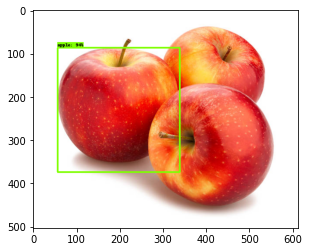

Running inference for /content/img2.jpg... Done


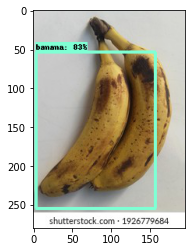

In [12]:
#Step 20- Running the Inference.

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.

    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.

    Args:
      path: the file path to the image

    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))

for image_path in img:

    print('Running inference for {}... '.format(image_path), end='')
    image_np=load_image_into_numpy_array(image_path)

    # Things to try:
    # Flip horizontally
    # image_np = np.fliplr(image_np).copy()
    # Convert image to grayscale
    # image_np = np.tile(
    #     np.mean(image_np, 2, keepdims=True), (1, 1, 3)).astype(np.uint8)

    # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
    input_tensor=tf.convert_to_tensor(image_np)
    # The model expects a batch of images, so add an axis with `tf.newaxis`.
    input_tensor=input_tensor[tf.newaxis, ...]

    # input_tensor = np.expand_dims(image_np, 0)
    detections=detect_fn(input_tensor)

    # All outputs are batches tensors.
    # Convert to numpy arrays, and take index [0] to remove the batch dimension.
    # We're only interested in the first num_detections.
    num_detections=int(detections.pop('num_detections'))
    detections={key:value[0,:num_detections].numpy()
                   for key,value in detections.items()}
    detections['num_detections']=num_detections

    # detection_classes should be ints.
    detections['detection_classes']=detections['detection_classes'].astype(np.int64)

    image_np_with_detections=image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
          image_np_with_detections,
          detections['detection_boxes'],
          detections['detection_classes'],
          detections['detection_scores'],
          category_index,
          use_normalized_coordinates=True,
          max_boxes_to_draw=1,     #max number of bounding boxes in the image
          min_score_thresh=.3,      #min prediction threshold
          agnostic_mode=False)
    %matplotlib inline
    plt.figure()
    plt.imshow(image_np_with_detections)
    print('Done')
    plt.show()

In [6]:
%cd '/content/gdrive/MyDrive/TensorFlow/models/research/object_detection'

/content/gdrive/MyDrive/TensorFlow/models/research/object_detection


In [7]:
pip install tensorflow-object-detection-api

     |████████████████████████████████| 577 kB 5.0 MB/s 
     |████████████████████████████████| 54 kB 2.6 MB/s 
     |████████████████████████████████| 54 kB 2.7 MB/s 
     |████████████████████████████████| 3.5 MB 34.8 MB/s 
  Created wheel for tensorflow-object-detection-api: filename=tensorflow_object_detection_api-0.1.1-py3-none-any.whl size=844512 sha256=108ea0e25ea8ef8267de2a6c14a4b3e7ec815ce718d3a78c49b3ae90ca4533fc
  Stored in directory: /root/.cache/pip/wheels/71/7e/a2/461ab817fbaef68ec9cc60df16d3669d1285f032e4c98179bf
Successfully built tensorflow-object-detection-api


In [28]:
import numpy as np
import os
import tensorflow as tf
import cv2
from utils import label_map_util
from utils import visualization_utils as vis_util

# path to the frozen graph:
PATH_TO_FROZEN_GRAPH = '/content/gdrive/MyDrive/TensorFlow/workspace/training_demo/exported-models/my_model/saved_model/saved_model.pb'

# path to the label map
PATH_TO_LABEL_MAP = '/content/gdrive/MyDrive/TensorFlow/workspace/training_demo/annotations/label_map.pbtxt'

# number of classes 
NUM_CLASSES = 3

cap = cv2.VideoCapture(0)

#reads the frozen graph
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.compat.v1.GraphDef()
    with tf.compat.v2.io.gfile.GFile(PATH_TO_FROZEN_GRAPH, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def = tf.compat.v1.GraphDef()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

        
label_map = label_map_util.load_labelmap(PATH_TO_LABEL_MAP)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

# Detection
with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        while True:
            # Read frame from camera
            ret, image_np = cap.read()
            # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
            image_np_expanded = np.expand_dims(image_np, axis=0)
            # Extract image tensor
            image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
            # Extract detection boxes
            boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
            # Extract detection scores
            scores = detection_graph.get_tensor_by_name('detection_scores:0')
            # Extract detection classes
            classes = detection_graph.get_tensor_by_name('detection_classes:0')
            # Extract number of detections
            num_detections = detection_graph.get_tensor_by_name(
                'num_detections:0')
            # Actual detection.
            (boxes, scores, classes, num_detections) = sess.run(
                [boxes, scores, classes, num_detections],
                feed_dict={image_tensor: image_np_expanded})
            # Visualization of the results of a detection.
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np,
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                line_thickness=3,
                )
        # Display output
            cv2.imshow('apple','banana','orange', cv2.resize(image_np, (1200, 800)))
            if cv2.waitKey(25) & 0xFF == ord('q'):
                cv2.destroyAllWindows()
                break

DecodeError: ignored

In [ ]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile
import cv2

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

# Define the video stream
cap = cv2.VideoCapture(0)  # Change only if you have more than one webcams

# What model to download.
# Models can bee found here: https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/detection_model_zoo.md
MODEL_NAME = 'ssd_inception_v2_coco_2017_11_17'
MODEL_FILE = MODEL_NAME + '.tar.gz'
DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'

# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_CKPT = MODEL_NAME + '/frozen_inference_graph.pb'

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = os.path.join('data', 'mscoco_label_map.pbtxt')

# Number of classes to detect
NUM_CLASSES = 90

# Download Model
if not os.path.exists(os.path.join(os.getcwd(), MODEL_FILE)):
    print("Downloading model")
    opener = urllib.request.URLopener()
    opener.retrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)
    tar_file = tarfile.open(MODEL_FILE)
    for file in tar_file.getmembers():
        file_name = os.path.basename(file.name)
        if 'frozen_inference_graph.pb' in file_name:
            tar_file.extract(file, os.getcwd())


# Load a (frozen) Tensorflow model into memory.
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.compat.v1.GraphDef()
    with tf.io.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')


# Loading label map
# Label maps map indices to category names, so that when our convolution network predicts `5`, we know that this corresponds to `airplane`.  Here we use internal utility functions, but anything that returns a dictionary mapping integers to appropriate string labels would be fine
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(
    label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)


# Helper code
def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape(
        (im_height, im_width, 3)).astype(np.uint8)


# Detection
with detection_graph.as_default():
    with tf.compat.v1.Session(graph=detection_graph) as sess:
        while True:
            # Read frame from camera
            ret, image_np = cap.read()
            # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
            image_np_expanded = np.expand_dims(image_np, axis=0)
            # Extract image tensor
            image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
            # Extract detection boxes
            boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
            # Extract detection scores
            scores = detection_graph.get_tensor_by_name('detection_scores:0')
            # Extract detection classes
            classes = detection_graph.get_tensor_by_name('detection_classes:0')
            # Extract number of detectionsd
            num_detections = detection_graph.get_tensor_by_name(
                'num_detections:0')
            # Actual detection.
            (boxes, scores, classes, num_detections) = sess.run(
                [boxes, scores, classes, num_detections],
                feed_dict={image_tensor: image_np_expanded})
            # Visualization of the results of a detection.
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np,
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                line_thickness=8)

            # Display output
            cv2.imshow('object detection', cv2.resize(image_np, (800, 600)))

            if cv2.waitKey(25) & 0xFF == ord('q'):
                cv2.destroyAllWindows()
                break

Acknowledgements:

Huge Thanks to [Lyudmil Vladimirov](http://pcwww.liv.ac.uk/~sglvladi/) for allowing me to use some of the content from their amazing [TensorFlow 2 Object Detection API](https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/latest/index.html) for Local Machines!

Link to their [GitHub Repository](https://github.com/sglvladi/TensorFlowObjectDetectionTutorial).